# 🧪 Early Detection of Diabetes – An EDA Approach

## 📝 Problem Statement

Diabetes is a metabolic disease that causes high blood sugar. If left untreated, it can lead to serious complications like heart disease, kidney failure, and blindness. Early diagnosis and lifestyle adjustments can prevent or delay its onset.

In this project, we will perform **Exploratory Data Analysis (EDA)** on a real-world dataset from the **Pima Indian population**, which contains health-related features of women over the age of 21. Our goal is to:
- Understand the data distribution and detect missing or incorrect values.
- Explore feature relationships with the outcome variable (diabetes or not).
- Identify trends or indicators that may help predict diabetes risk.

### 📁 Dataset Link

[🔗 Pima Indians Diabetes Dataset - Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
df = pd.read_csv("diabetes.csv")


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
print(df.shape)


(768, 9)


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
for col in cols_with_invalid_zeros:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\emada\AppData\Local\Temp\ipykernel_1760\1458184259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\emada\AppData\Local\Temp\ipykernel_1760\1458184259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

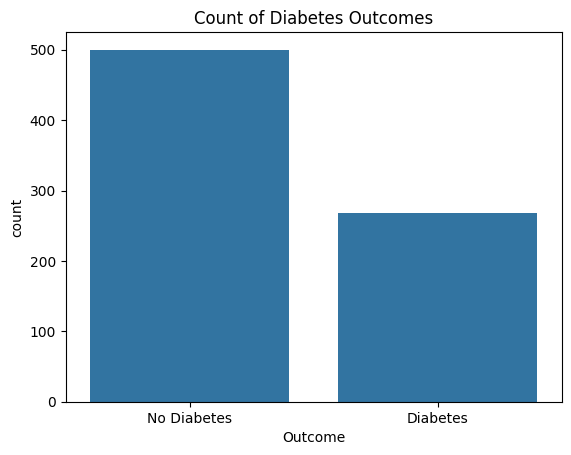

In [15]:
sns.countplot(x='Outcome', data=df)
plt.title('Count of Diabetes Outcomes')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

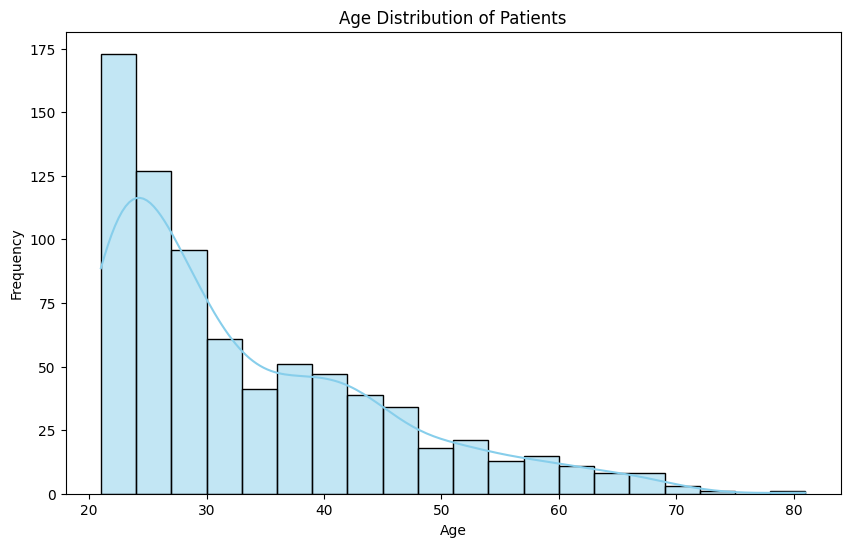

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

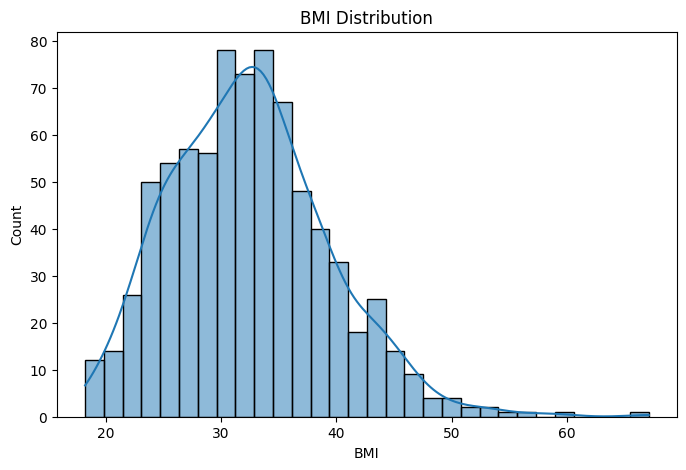

In [27]:
# BMI distribution
plt.figure(figsize=(8,5))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()

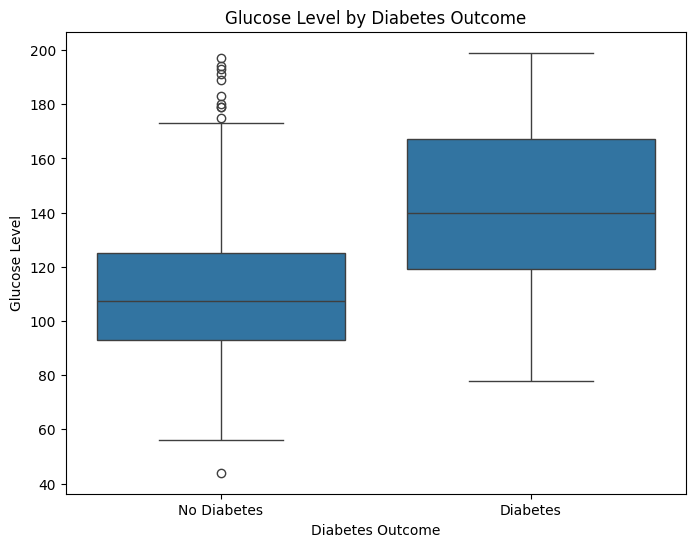

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Level by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Level')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

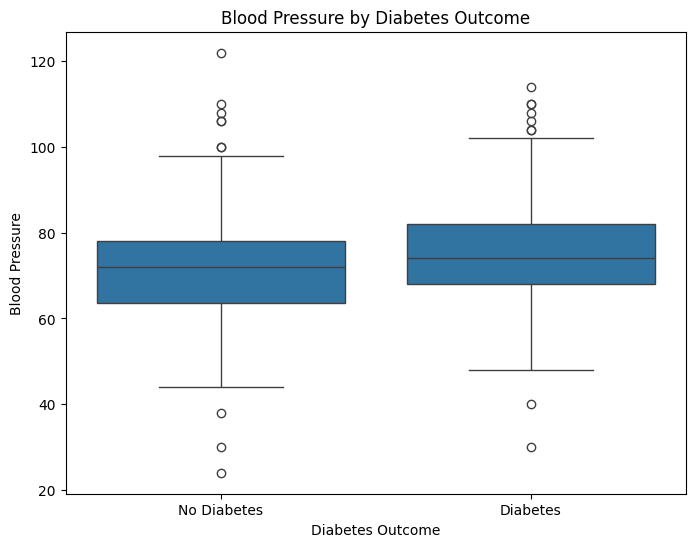

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title('Blood Pressure by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Blood Pressure')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

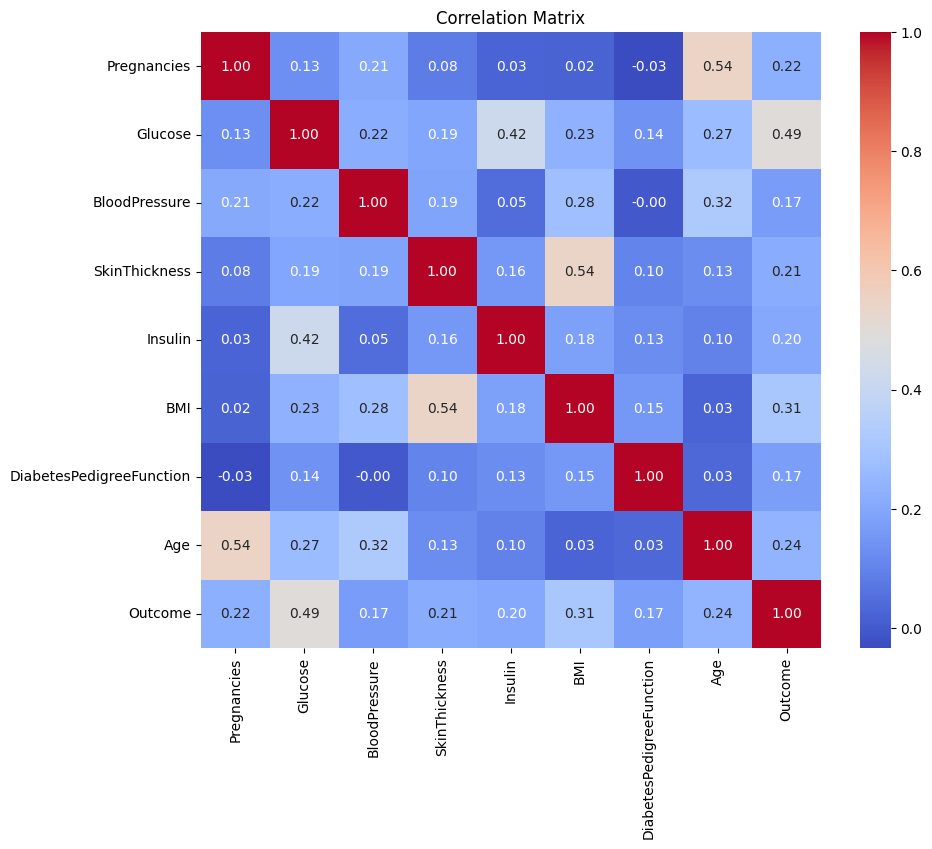

In [26]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## ✅ Summary of Insights

- Dataset shows **class imbalance**.
- Diabetic individuals tend to have **higher Glucose, BMI, and Age**.
- **Invalid zeros** needed to be handled in several features.
- **Correlation heatmap** highlights important features for predictive modeling.

You can now move forward to predictive modeling using Logistic Regression, Decision Trees, or any classifier of your choice.
